# 서울시 이상기후 취약지역 분석 

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'Malgun Gothic'
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### 시나리오
1. 가설 : 이상기후(폭염, 강수 등)에 따른 피해 취약지역 확인  
2. 이상기후 발생 시기 확인 필요 **  
3. 해당 시기에 서울시 구별 피해 확인   
4. 상슴 피해구역 군집화    

### i ) 이상 강수량 파악을 위한 연도별 월별 강수량 그래프 

In [134]:
rainfall=pd.read_csv("./data/강수량및강수일수.csv")
rainfall.head()

,2008. 01,2008. 01.1,2008. 02,2008. 02.1,2008. 03,2008. 03.1,2008. 04,2008. 04.1,2008. 05,2008. 05.1,...,2021. 08,2021. 08.1,2021. 09,2021. 09.1,2021. 10,2021. 10.1,2021. 11,2021. 11.1,2021. 12,2021. 12.1
0,강수량 (㎜),강수일수 (일),강수량 (㎜),강수일수 (일),강수량 (㎜),강수일수 (일),강수량 (㎜),강수일수 (일),강수량 (㎜),강수일수 (일),...,강수량 (㎜),강수일수 (일),강수량 (㎜),강수일수 (일),강수량 (㎜),강수일수 (일),강수량 (㎜),강수일수 (일),강수량 (㎜),강수일수 (일)
1,17.7,3,15.0,3,53.9,10,38.5,12,97.7,8,...,211.2,13,131.0,8,57.0,11,62.4,6,7.9,NaN


In [135]:
rainfall=rainfall.iloc[:,::2] # 강수량만 확인 
rainfall=rainfall.iloc[1::2,:] # 필요없는 text 정보 제거 
rainfall.head()

,2008. 01,2008. 02,2008. 03,2008. 04,2008. 05,2008. 06,2008. 07,2008. 08,2008. 09,2008. 10,...,2021. 03,2021. 04,2021. 05,2021. 06,2021. 07,2021. 08,2021. 09,2021. 10,2021. 11,2021. 12
1,17.7,15.0,53.9,38.5,97.7,165.0,530.8,251.2,99.2,41.8,...,110.9,124.1,183.1,104.6,168.3,211.2,131.0,57.0,62.4,7.9


In [136]:
rainfall.columns = [i.split('.')[1] for i in list(rainfall.columns)] # 열 이름 변경 

newrainfall=rainfall.iloc[:,:12] # 12개월 단위로 자름 

for i in range(0,12*12,12):
    newrainfall.loc[(i//12)+1]=list(rainfall.iloc[:,i:i+12].values[0]) # 2008~2019년 붙이기(null값 없는 년도)
    
for i in range(12*12,12*12+11*2,11):  
    newrainfall=pd.concat([newrainfall,rainfall.iloc[:,i:i+11]]) # 2020.2021년 붙이기(null값 있는 년도) 
    
newrainfall['years']=[i for i in range(2008,2022)] # 연도를 index로 두기 위해 
newrainfall.set_index('years', inplace=True)
newrainfall

In [139]:
# 결측치 중앙값으로 대체 
newrainfall[' 01']=newrainfall[' 01'].fillna(newrainfall[' 01'].median())
newrainfall[' 10']=newrainfall[' 10'].fillna(newrainfall[' 10'].median())
# 시각화를 위해 행 열 전환
newrainfall=newrainfall.transpose() 
newrainfall

years,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
01,17.7,5.7,29.3,8.9,6.7,22.1,13.0,11.3,1.0,14.9,8.5,23.8,18.9,13
02,15.0,36.9,55.3,29.1,0.8,74.1,16.2,22.7,47.6,11.1,29.6,26.8,53.1,7.1
03,53.9,63.9,82.5,14.6,47.4,27.3,7.2,9.6,40.5,7.9,49.5,47.3,16.3,110.9
04,38.5,66.5,62.8,110.1,157.0,71.7,31.0,80.5,76.8,61.6,130.3,37.8,16.9,124.1
05,97.7,109.0,124.0,53.4,8.2,132.0,63.0,28.9,160.5,16.1,222.0,74.0,112.4,183.1
06,165.0,132.0,127.6,404.5,91.9,28.3,98.1,99.0,54.4,66.6,171.5,194.4,139.6,104.6
07,530.8,659.4,239.2,1131.0,448.9,676.2,207.9,226.0,358.2,621.0,185.6,190.5,270.4,168.3
08,251.2,285.3,598.7,166.8,464.9,148.6,172.8,72.9,67.1,297.0,202.6,139.8,675.7,211.2
09,99.2,64.5,671.5,25.6,212.0,138.5,88.1,26.0,33.0,35.0,68.5,55.5,181.5,131.0
10,41.8,66.9,25.6,32.0,99.3,13.5,52.2,81.5,74.8,26.5,120.5,78.8,57,57.0


In [140]:
newrainfall=newrainfall.astype('float') # 데이터 형식 float로 변환 

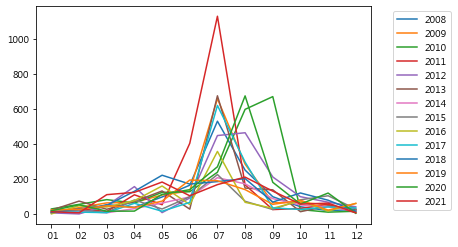

In [151]:
newrainfall.plot(kind='line')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(np.arange(0,12),labels=list(newrainfall.index)) # x축 값 모두 표현 
plt.show()

### ii ) 이상 기온 파악을 위한 연도별 월별 기온 그래프 

In [87]:
temperature=pd.read_csv("./data/기상개황.csv")
temperature.head()

,기상개황별(1),기상개황별(2),2008. 01,2008. 02,2008. 03,2008. 04,2008. 05,2008. 06,2008. 07,2008. 08,...,2021. 03,2021. 04,2021. 05,2021. 06,2021. 07,2021. 08,2021. 09,2021. 10,2021. 11,2021. 12
0,기온 (℃),평균,-1.7,-1.2,7.3,14.1,17.7,21.5,25.1,25.3,...,9.0,14.2,17.1,22.8,28.1,25.9,22.6,15.6,8.2,0.6
1,기온 (℃),평균최고,1.9,3.2,11.9,19.5,22.7,26.1,28.4,29.5,...,14.8,19.5,21.9,27.6,32.2,29.7,26.9,20.5,13.1,5.1
2,기온 (℃),극점최고,7.3,10.5,19.8,28.0,28.5,29.6,32.9,35.4,...,22.9,28.2,30.8,31.6,36.5,33.7,30.3,28.8,21.3,13.3
3,기온 (℃),평균최저,-5.0,-4.9,3.7,9.3,13.1,17.6,22.6,21.8,...,4.3,9.5,12.8,18.9,24.6,22.8,18.8,11.6,4.0,-3.5
4,기온 (℃),극점최저,-11.1,-10.1,-1.7,3.8,8.1,13.7,20.2,16.3,...,-1.2,3.1,7.3,13.3,19.6,18.1,16.0,1.3,-3.7,-15.5


In [88]:
## 평균기온 그래프 ##
temperature_1=temperature.iloc[:1,2:]  
temperature_1.columns = [i.split('.')[1] for i in list(temperature_1.columns)] # 열 이름 변경 
newtemperature=temperature_1.iloc[:,:12] # 12개월 단위로 자름

for i in range(0,14*12,12):
    newtemperature.loc[i//12]=list(temperature_1.iloc[0,i:i+12]) # 2008~2021년 붙이기(null값 없는 년도)
    
newtemperature['years']=[i for i in range(2008,2022)] # 연도를 index로 두기 위해 
newtemperature.set_index('years', inplace=True)
newtemperature

newtemperature=newtemperature.transpose() # 시각화를 위해 행 열 전환
newtemperature=newtemperature.astype('float') # 데이터 형식 float로 변환 
newtemperature

years,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
01,-1.7,-2.0,-4.5,-7.2,-2.8,-3.4,-0.7,-0.9,-3.2,-1.8,-4.0,-0.9,1.6,-2.4
02,-1.2,2.9,1.4,1.2,-2.0,-1.2,1.9,1.0,0.2,-0.2,-1.6,1.0,2.5,2.7
03,7.3,6.0,4.3,3.6,5.1,5.1,7.9,6.3,7.0,6.3,8.1,7.1,7.7,9.0
04,14.1,12.7,9.5,10.7,12.3,10.0,14.0,13.3,14.1,13.9,13.0,12.1,11.1,14.2
05,17.7,19.1,17.2,17.9,19.7,18.2,18.9,18.9,19.6,19.5,18.2,19.4,18.0,17.1
06,21.5,22.4,23.4,22.0,24.1,24.4,23.1,23.6,23.6,23.3,23.1,22.5,23.9,22.8
07,25.1,24.3,25.8,24.6,25.4,25.5,26.1,25.8,26.2,26.9,27.8,25.9,24.1,28.1
08,25.3,25.7,26.5,25.8,27.1,27.7,25.2,26.3,28.0,25.9,28.8,27.2,26.5,25.9
09,22.0,21.8,21.8,21.8,21.0,21.8,22.1,22.4,23.1,22.1,21.5,22.6,21.4,22.6
10,16.1,16.0,14.5,14.2,15.3,15.8,15.6,15.5,16.1,16.4,13.1,16.4,14.3,15.6


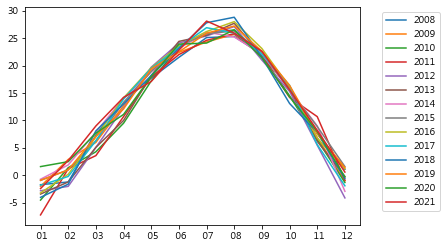

In [89]:
# 평균기온 
newtemperature.plot(kind='line')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(np.arange(0,12),labels=list(newtemperature.index)) # x축 값 모두 표현 
plt.show()

-----


In [90]:
## 평균'최고'기온 그래프 ##
temperature_2=temperature.iloc[:2,2:]  
temperature_2.columns = [i.split('.')[1] for i in list(temperature_2.columns)] # 열 이름 변경 
newtemperature=temperature_2.iloc[:,:12] # 12개월 단위로 자름

for i in range(0,14*12,12):
    newtemperature.loc[i//12+1]=list(temperature_2.iloc[1,i:i+12]) # 2008~2021년 붙이기(null값 없는 년도)

newtemperature=newtemperature.iloc[1:,:] # 첫째행 제거(평균기온)

newtemperature['years']=[i for i in range(2008,2022)] # 연도를 index로 두기 위해 
newtemperature.set_index('years', inplace=True)
newtemperature

newtemperature=newtemperature.transpose() # 시각화를 위해 행 열 전환
newtemperature=newtemperature.astype('float') # 데이터 형식 float로 변환 
newtemperature

years,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
01,1.9,2.3,-0.7,-3.4,1.3,0.3,3.5,3.6,1.1,2.9,0.1,4.1,5.9,2.2
02,3.2,6.8,4.9,5.9,3.0,2.8,6.6,6.0,5.1,4.8,3.3,6.0,7.2,7.9
03,11.9,10.6,8.1,8.3,9.5,10.8,13.1,12.4,12.6,12.3,13.6,12.4,13.3,14.8
04,19.5,18.0,14.0,15.6,17.9,15.0,19.6,18.8,20.3,20.0,18.5,17.6,16.6,19.5
05,22.7,24.3,22.0,23.0,25.1,23.6,25.3,24.9,25.7,25.4,23.3,25.6,23.3,21.9
06,26.1,26.7,28.2,26.6,29.7,29.2,27.8,29.5,28.7,28.8,28.4,27.7,29.0,27.6
07,28.4,28.2,29.3,28.0,29.0,28.3,30.6,30.0,29.8,30.4,32.1,30.1,28.0,32.2
08,29.5,29.5,30.0,29.5,30.9,31.1,29.0,30.8,32.6,29.7,33.3,31.6,29.3,29.7
09,26.9,26.3,26.0,26.6,25.0,25.9,27.0,28.1,27.9,27.4,26.0,27.1,25.6,26.9
10,21.0,20.9,19.3,19.3,20.5,21.2,21.4,21.2,21.3,22.5,18.6,21.8,19.5,20.5


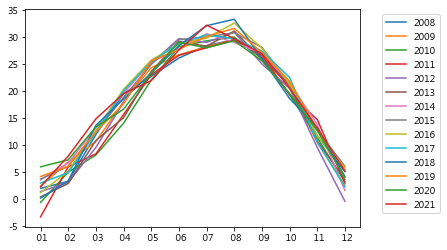

In [91]:
# 평균 최고 기온 
newtemperature.plot(kind='line')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(np.arange(0,12),labels=list(newtemperature.index)) # x축 값 모두 표현 
plt.show()

---

In [92]:
## 극점최고기온 그래프 ##
temperature_3=temperature.iloc[:3,2:]  
temperature_3.columns = [i.split('.')[1] for i in list(temperature_3.columns)] # 열 이름 변경 
newtemperature=temperature_3.iloc[:,:12] # 12개월 단위로 자름

for i in range(0,14*12,12):
    newtemperature.loc[i//12+2]=list(temperature_3.iloc[2,i:i+12]) # 2008~2021년 붙이기(null값 없는 년도)

newtemperature=newtemperature.iloc[2:,:] # 첫째&둘째행 제거(평균기온)

newtemperature['years']=[i for i in range(2008,2022)] # 연도를 index로 두기 위해 
newtemperature.set_index('years', inplace=True)
newtemperature

newtemperature=newtemperature.transpose() # 시각화를 위해 행 열 전환
newtemperature=newtemperature.astype('float') # 데이터 형식 float로 변환 
newtemperature

years,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
01,7.3,12.2,8.4,0.3,8.4,11.5,8.2,9.0,9.5,11.4,8.7,8.5,11.9,13.9
02,10.5,16.1,17.9,13.2,12.1,13.9,16.4,13.0,14.4,12.3,10.4,14.5,15.6,17.4
03,19.8,22.2,14.2,16.8,16.2,23.8,23.8,21.9,21.4,18.9,22.1,17.6,20.6,22.9
04,28.0,25.8,20.7,19.0,29.4,21.6,26.2,28.3,29.6,27.8,26.3,28.2,23.8,28.2
05,28.5,31.0,28.6,31.2,29.3,31.8,33.3,32.2,31.9,30.3,29.6,33.4,30.0,30.8
06,29.6,32.4,32.7,32.9,33.5,32.6,31.1,34.9,32.2,34.1,32.9,32.8,35.4,31.6
07,32.9,32.4,32.3,34.1,33.2,31.3,34.4,36.0,34.1,35.4,38.3,36.1,32.9,36.5
08,35.4,34.4,33.8,34.1,36.7,33.9,35.8,34.4,36.6,35.3,39.6,36.8,34.5,33.7
09,32.0,29.9,31.4,32.4,29.5,31.1,31.3,31.0,31.1,31.4,30.9,30.5,29.5,30.3
10,28.3,26.4,24.2,23.4,26.0,28.1,29.0,26.6,29.0,29.4,25.6,28.2,23.6,28.8


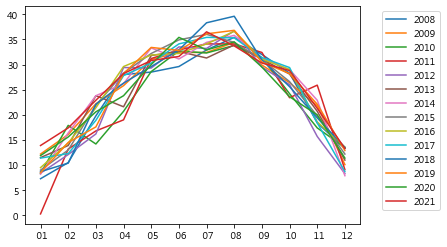

In [93]:
# 극점 최고 기온 
newtemperature.plot(kind='line')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(np.arange(0,12),labels=list(newtemperature.index)) # x축 값 모두 표현 
plt.show()